# <center> **CLIM 680 Assignment** </center>

```
The following notebook makes use of Soil Moisture Active Passive (SMAP) Level 4 (L4) data which consists of the assimilation of raw or corrected measurements into a land surface model to produce geophysical parameters. Data files from 20210627 are obtained from the Center for Ocean-Land-Atmosphere Studies' remote server, though they are publicly available through NASA-designated data centers. The file contains information pertaining to the heat flux, soil moisture, and surface state variables at the stated time. This dataset was chosen because it is relevant to my research.
```

## Table of Contents

---
* [Imports](#Imports)
* [Assignment One](#AOne)
    * [Data Info and Access](#DataAc1)
    * [Filled Contour](#Contour)
    * [Filled Contour Map](#Map)
* [Assignment Two](#ATwo)
    * [Multi-File Access](#DataAc2)
    * [Data Aggregation](#Groupby)
    * [Climatology](#Clim)
* [Assignment Three](#AThree)
    * [Composite Data](#Comp)
    
---

## Imports<a class="anchor" id="Imports"></a>

In [108]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import glob
import calendar
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
#import sys
#!conda install -c conda-forge --yes --prefix {sys.prefix} h5netcdf

In [3]:
#xr.__version__

## Assignment One<a class="anchor" id="AOne"></a>

### Data Info & Access<a class="anchor" id="DataAc1"></a>

In [4]:
file = "/shared/land/SMAP/latest_L4/daily/SMAP_L4_SM_gph_20210627.nc4"
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:                            (x: 3856, y: 1624)
Coordinates:
  * x                                  (x) float64 -1.736e+07 ... 1.736e+07
  * y                                  (y) float64 7.31e+06 ... -7.31e+06
Data variables:
    EASE2_global_projection            |S1 ...
    cell_column                        (y, x) float64 ...
    cell_lat                           (y, x) float32 ...
    cell_lon                           (y, x) float32 ...
    cell_row                           (y, x) float64 ...
    time                               datetime64[ns] ...
    baseflow_flux                      (y, x) float32 ...
    heat_flux_ground                   (y, x) float32 ...
    heat_flux_latent                   (y, x) float32 ...
    heat_flux_sensible                 (y, x) float32 ...
    height_lowatmmodlay                (y, x) float32 ...
    land_evapotranspiration_flux       (y, x) float32 ...
    land_fraction_saturated            (y, x) float32 ...
   

### Filled Contour<a class="anchor" id="Contour"></a>

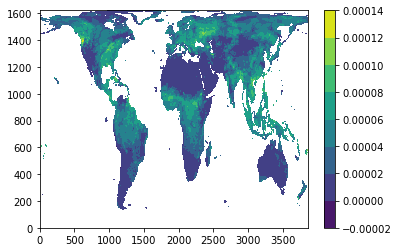

In [5]:
plt.contourf(ds["land_evapotranspiration_flux"][-1::-1,:]);
plt.colorbar()

### Filled Contour Map<a class="anchor" id="Map"></a>

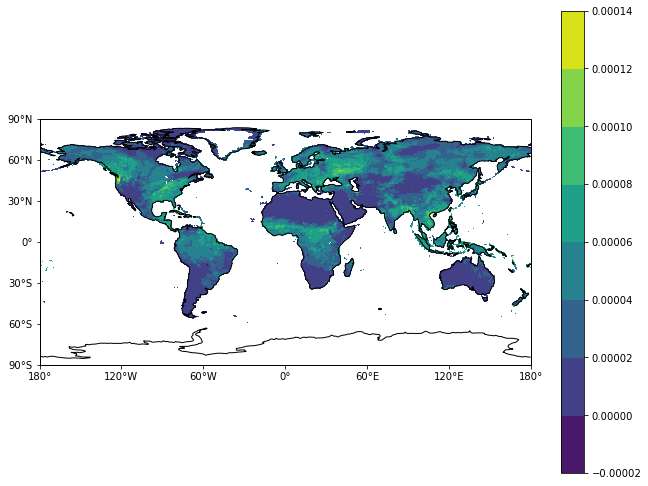

In [6]:
# Set size of image
fig = plt.figure(figsize=(11,8.5))

# Set the axes projection for plot
ax = plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
cs = ax.contourf(ds['cell_lon'], ds['cell_lat'], ds['land_evapotranspiration_flux'], transform = ccrs.PlateCarree())

# Add Coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs)

## Assignment Two<a class="anchor" id="ATwo"></a>

### Multi-File Access<a class="anchor" id="DataAc2"></a>

In [45]:
ds2_list = glob.glob("/shared/land/SMAP/latest_L4/daily/SMAP_L4_SM_gph_201*.nc4")
#netcdf_list

In [46]:
ds2 = xr.open_mfdataset(paths=ds2_list, combine='nested', concat_dim='time').isel(y=slice(600,120, -1), 
                                                                                  x=slice(540,1280))
ds2

<xarray.Dataset>
Dimensions:                            (time: 1736, x: 740, y: 480)
Coordinates:
  * x                                  (x) float64 -1.25e+07 ... -5.842e+06
  * y                                  (y) float64 1.905e+06 ... 6.22e+06
  * time                               (time) datetime64[ns] 2016-03-25T01:28:55.816000 ... 2019-08-29T01:28:55.816000
Data variables:
    EASE2_global_projection            (time) |S1 b'' b'' b'' ... b'' b'' b''
    cell_column                        (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lat                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lon                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_row                           (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    baseflow_flux                      (time, y, x) float32 dask.array<chunksize=(1, 48

### Data Aggregation<a class="anchor" id="Groupby"></a>

In [51]:
ds2_climo=ds2.groupby('time.month').mean(dim='time')
ds2_climo

<xarray.Dataset>
Dimensions:                            (month: 12, x: 740, y: 480)
Coordinates:
  * x                                  (x) float64 -1.25e+07 ... -5.842e+06
  * y                                  (y) float64 1.905e+06 ... 6.22e+06
  * month                              (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    cell_column                        (month, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lat                           (month, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lon                           (month, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_row                           (month, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    baseflow_flux                      (month, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    heat_flux_ground                   (month, y, x) float32 dask.array<chunksize=(1, 4

### 12-Panel Climatology<a class="anchor" id="Clim"></a>

Text(0.5, 0.94, 'Monthly Climatology of Leaf Area Index (2015-2019) from SMAP L4')

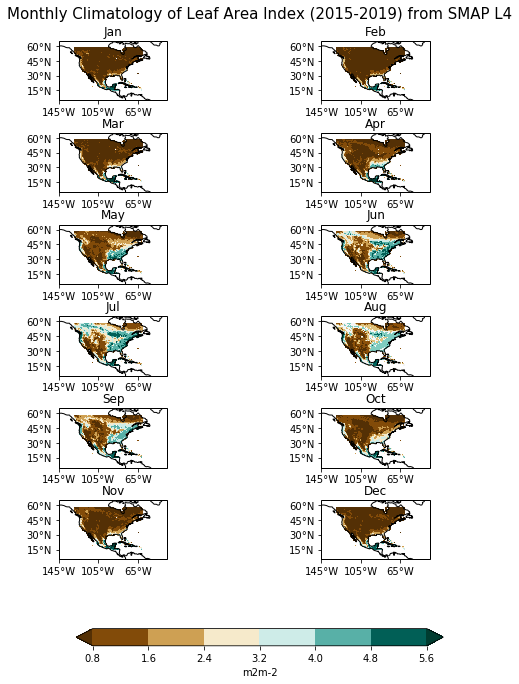

In [58]:
# Define the figure and each axis for the 6 rows and 2 columns
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(nrows=6,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,12), constrained_layout=True)

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()


#Loop over all of the months and plot
for i in list(range(0,12)):
    
        # Contour plot
        cs=axs[i].contourf(ds2_climo["cell_lon"][i,:,:], ds2_climo['cell_lat'][i,:,:], ds2_climo["leaf_area_index"][i,:,:],
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

        # Title each subplot with the name of the model
        axs[i].set_title(calendar.month_abbr[i+1])
        
        # Set extent
        axs[i].set_extent([-135, -35, 5, 65], crs=ccrs.PlateCarree())
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-145,-30,40), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(15,65,15), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        # Draw the coastines for each subplot
        axs[i].coastlines()
        

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(left=0.05,
                   bottom=0.3,
                   right=0.9,
                   top=0.9,
                   wspace=0.02,
                   hspace=0.55)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m2m-2')

# Add a big title at the top
start = str(ds2.time.min().values)[0:4]
end = str(ds2.time.max().values)[0:4]
plt.suptitle("Monthly Climatology of Leaf Area Index ("+start+"-"+end+") from SMAP L4", fontsize=15, y=.94)

## Assignment Three<a class="anchor" id="AThree"></a>

### Composite Data<a class="anchor" id="Comp"></a>

In [241]:
#Create list of all SMAP files
ds3_list = glob.glob("/shared/land/SMAP/latest_L4/daily/SMAP_L4_SM_gph_20*.nc4") 

ds3_list.sort()
#ds3_list

In [242]:
#Open all files in list
ds3 = xr.open_mfdataset(paths=ds3_list, combine='nested', concat_dim='time').isel(y=slice(600,120, -1), 
                                                                                  x=slice(540,1280))
ds3 #Display xarray of data

<xarray.Dataset>
Dimensions:                            (time: 2345, x: 740, y: 480)
Coordinates:
  * x                                  (x) float64 -1.25e+07 ... -5.842e+06
  * y                                  (y) float64 1.905e+06 ... 6.22e+06
  * time                               (time) datetime64[ns] 2015-04-01T01:28:55.816000 ... 2021-08-31T01:28:55.816000
Data variables:
    EASE2_global_projection            (time) |S1 b'' b'' b'' ... b'' b'' b''
    cell_column                        (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lat                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lon                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_row                           (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    baseflow_flux                      (time, y, x) float32 dask.array<chunksize=(1, 48

In [98]:
#Open Standardized Precipitation Index
url = "http://iridl.ldeo.columbia.edu/SOURCES/.IRI/.Analyses/.SPI/.SPI-CAMSOPI_1-Month/dods" 
spi = xr.open_dataset(url, decode_times=False)

In [123]:
spi #Display SPI data

<xarray.Dataset>
Dimensions:              (T: 514, X: 144, Y: 72)
Coordinates:
  * X                    (X) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * T                    (T) float32 228.5 229.5 230.5 ... 739.5 740.5 741.5
  * Y                    (Y) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    SPI-CAMSOPI_1-Month  (Y, X, T) float64 ...
Attributes:
    Conventions:  IRIDL

In [113]:
#Create variables for start and end of SPI data 
#Recorded in xarray as months since 1960-01-01
start_date = datetime(1979, 1, 1)
end_date = datetime(2021, 10, 1)

In [114]:
#Create datetime64 formatting for SPI data
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1979-01-01', '1979-02-01', '1979-03-01', '1979-04-01',
               '1979-05-01', '1979-06-01', '1979-07-01', '1979-08-01',
               '1979-09-01', '1979-10-01',
               ...
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01'],
              dtype='datetime64[ns]', length=514, freq='MS')

In [120]:
#Assign new variable xarray that has 
#datetime64 time coordinates
spi2 = spi.assign_coords(T2=("T2", dates))

In [124]:
spi2 #Display new xarray

<xarray.Dataset>
Dimensions:              (T: 514, T2: 514, X: 144, Y: 72)
Coordinates:
  * X                    (X) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * T                    (T) float32 228.5 229.5 230.5 ... 739.5 740.5 741.5
  * Y                    (Y) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * T2                   (T2) datetime64[ns] 1979-01-01 ... 2021-10-01
Data variables:
    SPI-CAMSOPI_1-Month  (Y, X, T) float64 ...
Attributes:
    Conventions:  IRIDL

In [202]:
#Slice xarray to only get US bounds
spi_us = spi2.isel(Y=slice(41,59), X=slice(92,119))

In [196]:
#Average over entire region
spi_us_time = spi_us.mean(dim=['X', 'Y'])

In [210]:
#Slice to same time duration as SMAP data
spi_dat = spi_us_time.isel(T=slice(435,514), T2=slice(435,514))
spi_dat

<xarray.Dataset>
Dimensions:              (T: 79, T2: 79)
Coordinates:
  * T                    (T) float32 663.5 664.5 665.5 ... 739.5 740.5 741.5
  * T2                   (T2) datetime64[ns] 2015-04-01 ... 2021-10-01
Data variables:
    SPI-CAMSOPI_1-Month  (T) float64 0.1426 0.1569 0.07214 ... -0.3458 -0.1037

In [223]:
#Set conditions for moist, normal, and dry 
moist=spi_dat['SPI-CAMSOPI_1-Month'].where(spi_dat['SPI-CAMSOPI_1-Month']>=0.51)
dry=spi_dat['SPI-CAMSOPI_1-Month'].where(spi_dat['SPI-CAMSOPI_1-Month']<=-0.51)
normal=spi_dat['SPI-CAMSOPI_1-Month'].where(np.logical_and(spi_dat['SPI-CAMSOPI_1-Month']>-0.51,
                                              spi_dat['SPI-CAMSOPI_1-Month']<0.51))

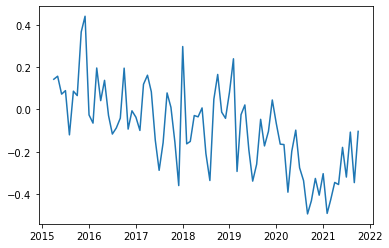

In [211]:
plt.plot(spi_dat["T2"], spi_dat["SPI-CAMSOPI_1-Month"] )

In [259]:
ds_test=ds3["precipitation_total_surface_flux"].groupby('time.year')


TypeError: 'DataArrayGroupBy' object is not subscriptable

In [300]:
#ds3
test5=ds3["time"].groupby('time.year')
#test6=test5.groupby('time.month').mean()
test6=ds3

AttributeError: 'Dataset' object has no attribute 'test5'

In [283]:
years=ds3["time"].groupby('time.year').mean()
years=[]
test2=years

for i in range(0,len(years)):
    test2[i]=ds3["precipitation_total_surface_flux"][:,:,].groupby('time.month').mean()
    ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
    

In [290]:
ds3["precipitation_total_surface_flux"][:,:,].groupby('time.month').mean()

<xarray.DataArray 'time' ()>
array('2021-05-02T01:28:55.816000000', dtype='datetime64[ns]')
Coordinates:
    year     int64 2021

In [301]:
test5=ds3.resample(time="1MS").mean(dim="time")

In [304]:
test5

<xarray.Dataset>
Dimensions:                            (time: 77, x: 740, y: 480)
Coordinates:
  * time                               (time) datetime64[ns] 2015-04-01 ... 2021-08-01
  * x                                  (x) float64 -1.25e+07 ... -5.842e+06
  * y                                  (y) float64 1.905e+06 ... 6.22e+06
Data variables:
    cell_column                        (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lat                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_lon                           (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    cell_row                           (time, y, x) float64 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    baseflow_flux                      (time, y, x) float32 dask.array<chunksize=(1, 480, 740), meta=np.ndarray>
    heat_flux_ground                   (time, y, x) float32 dask.array<chunksize=(1, 4

In [295]:
test3=ds3["precipitation_total_surface_flux"].sel(time=years[i].year)
test3

KeyError: 2021

In [ ]:
ds3["precipitation_total_surface_flux"].groupby

In [254]:
ds3_climo=ds3["precipitation_total_surface_flux"].groupby('time.month', 'time.year').mean()
#ds3_anoms=ds3["precipitation_total_surface_flux"].groupby('time.month')-ds3_climo
#ds3_anoms
ds3_climo

<xarray.DataArray 'precipitation_total_surface_flux' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,)>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [245]:
ds3_anoms['time']

<xarray.DataArray 'time' (time: 2345)>
array(['2015-04-01T01:28:55.816000000', '2015-04-02T01:28:55.816000000',
       '2015-04-03T01:28:55.816000000', ..., '2021-08-29T01:28:55.816000000',
       '2021-08-30T01:28:55.816000000', '2021-08-31T01:28:55.816000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-04-01T01:28:55.816000 ... 2021-08-31T01:28:55.816000
    month    (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 8 8 8 8 8 8 8 8 8 8 8 8
Attributes:
    long_name:  Time
    delta_t:    0000-00-00 03:00:00

In [233]:
normal.dropna(dim='T')['T']

<xarray.DataArray 'T' (T: 79)>
array([663.5, 664.5, 665.5, 666.5, 667.5, 668.5, 669.5, 670.5, 671.5, 672.5,
       673.5, 674.5, 675.5, 676.5, 677.5, 678.5, 679.5, 680.5, 681.5, 682.5,
       683.5, 684.5, 685.5, 686.5, 687.5, 688.5, 689.5, 690.5, 691.5, 692.5,
       693.5, 694.5, 695.5, 696.5, 697.5, 698.5, 699.5, 700.5, 701.5, 702.5,
       703.5, 704.5, 705.5, 706.5, 707.5, 708.5, 709.5, 710.5, 711.5, 712.5,
       713.5, 714.5, 715.5, 716.5, 717.5, 718.5, 719.5, 720.5, 721.5, 722.5,
       723.5, 724.5, 725.5, 726.5, 727.5, 728.5, 729.5, 730.5, 731.5, 732.5,
       733.5, 734.5, 735.5, 736.5, 737.5, 738.5, 739.5, 740.5, 741.5],
      dtype=float32)
Coordinates:
  * T        (T) float32 663.5 664.5 665.5 666.5 ... 738.5 739.5 740.5 741.5
Attributes:
    standard_name:  time
    pointwidth:     1.0
    expires:        1638316800
    calendar:       360
    gridtype:       0
    units:          months since 1960-01-01

In [230]:
norm_precip=ds3_anoms.sel(T2=normal.dropna(dim='T')['T']).mean(dim='T')

ValueError: dimensions or multi-index levels ['T2'] do not exist